# BigEarthNetv2-RGB data preparation
The BigEarthNetv2 dataset contains 549488 Sentinel-2 image patches with the corresponding masks that can be used to train a model for satellite image classification and segmentation. For each patch the dataset contains 12 of the Sentinel-2 13 bands, that is, all but B10. In this notebook are implemeted some functions to create PNG files using the three RGB bands (B02, B03, B04) for all the patches available in BigEarthnetv2. More information about the dataset is available at the [BigEarthNet](https://bigearth.net/) website.

* B01 (resolution = 60m/px, central wavelength = 443nm, bandwidth = 20nm, use: aerosol detection)
* B02 (blue, resolution = 10m/px, central wavelength = 490nm, bandwidth = 65nm, use: Band 2 is useful for soil and vegetation discrimination, forest type mapping and identifying man-made features. It is scattered by the atmosphere, it illuminates material in shadows better than longer wavelengths, and it penetrates clear water better than other colors. It is absorbed by chlorophyll, which results in darker plants.)
* B03 (green, resolution = 10m/px, central wavelength = 560nm, bandwidth = 35nm, use: it gives excellent contrast between clear and turbid (muddy) water, and penetrates clear water fairly well. It helps in highlighting oil on water surfaces, and vegetation. It reflects green light stronger than any other visible color. Man-made features are still visible)
* B04 (red, resolution = 10m/px, central wavelength = 665nm, bandwidth = 30nm, use: it is strongly reflected by dead foliage and is useful for identifying vegetation types, soils and urban (city and town) areas. It has limited water penetration and doesn’t reflect well from live foliage with chlorophyll.)
* B05 (red edge, resolution = 20m/px, central wavelength = 705nm, bandwidth = 15nm, use: vegetation classification)
* B06 (resolution = 20m/px, central wavelength = 740nm, bandwidth = 15nm, use: vegetation classification)
* B07 (resolution = 20m/px, central wavelength = 783nm, bandwidth = 20nm, use: vegetation classification)
* B08 (NIR, resolution = 10m/px, central wavelength = 842nm, bandwidth = 115nm, use: The near infrared band is good for mapping shorelines and biomass content, as well as at detecting and analyzing vegetation)
* B8A (resolution = 20m/px, central wavelength = 865nm, bandwidth = 20nm, use: For classifying vegetation)
* B09 (resolution = 60m/px, central wavelength = 945nm, bandwidth = 20nm, use: it is good for detecting water vapour)
* B10 (resolution = 60m/px, central wavelength = 1375nm, bandwidth = 30nm, use: For cirrus cloud detection)
* B11 (SWIR 1, resolution = 20m/px, central wavelength = 1610nm, bandwidth = 90nm, use: It is useful for measuring the moisture content of soil and vegetation, and it provides good contrast between different types of vegetation. It helps differentiate between snow and clouds. On the other hand, it has limited cloud penetration)
* B12 (SWIR 2, resolution = 20m/px, central wavelength = 2190nm, bandwidth = 180nm, use: It is useful for measuring the moisture content of soil and vegetation, and it provides good contrast between different types of vegetation. It helps differentiate between snow and clouds. On the other hand, it has limited cloud penetration)

## Corine Land Cover classes
The integer values in the masks represent the land cover classes in the Corine Land Cover ([CLC](https://land.copernicus.eu/content/corine-land-cover-nomenclature-guidelines/html/)) classification system. Corine is a hierarchical classification system with three levels. The 1st level has 5 classes, the 2nd level 14, and the 3rd level 44 classes that represents the total number of classes available in Corine. In the images pixels are classified according to the 3rd level code. The code 999, that doesn't belong to the Corine2018 codes, is used to annotate the pixels that were not classified. The number of classses used in the masks are 44 + 1 = 45.

| Category | Code |RGB Color Code|
|:--------|:--------|:------|
| Artificial surfaces | 1 | 230-000-077|   
| Urban fabric | 11 |255-000-000|
| Continuous urban fabric | 111 |204-077-242|
| Discontinuous urban fabric | 112 | 204-000-000|
| Industrial, commercial and transport units | 12 |230-204-204|
| Industrial or commercial units | 121 |230-204-230|
| Road and rail networks and associated land | 122 |166-000-204| 
| Port areas | 123 |166-077-000|255-077-255|
| Airports | 124 |
| Mine, dump and construction sites | 13 |
| Mineral extraction sites | 131 |
| Dump sites | 132 |
| Construction sites | 133 | 
| Artificial, non-agricultural vegetated areas | 14 |
| Green urban areas | 141 | 
| Sport and leisure facilities | 142 | 
| Agricultural areas | 2 |
| Arable land | 21 |
| Non-irrigated arable land | 211 | 
| Permanently irrigated land | 212 | 
| Rice fields | 213 |
| Permanent crops | 22 |
| Vineyards | 221 | 
| Fruit trees and berry plantations | 222 | 
| Olive groves | 223 | 
| Pastures | 23 |
| Pastures | 231 | 
| Heterogeneous agricultural areas | 24 |
| Annual crops associated with permanent crops | 241 | 
| Complex cultivation patterns | 242 | 
| Land principally occupied by agriculture, with significant areas of natural vegetation | 243 |
| Agro-forestry areas | 244 |
| Forest and semi natural areas | 3 |
| Forests | 31 |
| Broad-leaved forest | 311 | 
| Coniferous forest | 312 | 
| Mixed forest | 313 | 
| Scrub and/or herbaceous vegetation associations | 32 |
| Natural grasslands | 321 |
| Moors and heathland | 322 |
| Sclerophyllous vegetation | 323 |
| Transitional woodland-shrub | 324 |
| Open spaces with little or no vegetation | 33 |
| Beaches, dunes, sands | 331 |
| Bare rock | 332 |
| Sparsely vegetated areas | 333 |
| Burnt areas | 334 |
| Wetlands | 4 |
| Inland wetlands | 41 |
| Inland marshes | 411 |
| Peat bogs | 412 |
| Maritime wetlands | 42 |
| Salt marshes | 421 |
| Salines | 422 |
| Intertidal flats | 423 |
| Water bodies | 5 |
| Inland waters | 51 |
| Water courses | 511 |
| Water bodies | 512 |
| Marine waters | 52 |
| Coastal lagoons | 521 |
| Estuaries | 522 |
| Sea and ocean | 523 |

According to the paper by Closen et al., BigEarthNetv2 uses only 19 classes of the Corine Land Cover 2018 

## Remote sensing derived indices 
RGB, NIR and SWIR bands can be used to build indices to enhance the response for specif types of land cover such as vegetation built or burnt areas. Some of these indeces are: NDVI, SAVI, ARVI, VARI, NDBI, NBR.

## Notebook workflow
The purpose of this notebook is to transform the bands and masks available from the BigEarthNetv2 dataset in TIFF format into RGB images and masks in PNG format in order to be loaded into batches for the training of a segmentation model. The reason to transform the TIFF images into PNG format is that the TIFF format contains metadata and is more challenging to use than PNG for training. We will use only the three RGB bands: B02 (blue), B03 (green), and B04 (red). The masks have been created using 19 classes of the CORINE Land Cover (CLC) nomenclature. The data preparation phase consists of 

1. Collect the RGB bands of each image patch
2. Create a RGB PNG file for each patch using the three bands in the TIFF format
3. Create a mask PNG file for each patch using the single band in the TIFF format  
4. Create three datasets of examples, with RGB and mask in the PNG format, for training, validation and test

The Sentinel-2 BigEarthNetv2 dataset, patches and masks, can be downloaded as tar and zst compressed files of 59 GB and 270 MB respectively. It can be decompressed frpm zst, in a MS Windows OS, using [7-Zip](https://www.7-zip.org/) For example to unzip the masks use the comands:
````
$ 7z x Reference_Maps.tar.zst
````
and then tar
````
$ tar xvf Reference_Maps.tar
````

## Structure of the dataset
The BigEarthNetv2 dataset is organized into two root folders, one for the images and one for the masks, like in the following example with only two image patches of one tile. 
* BigEarthNet-S2
    * images
        * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP
            * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57
                * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_B02.tif
                * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_B03.tif
                * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_B04.tif
            * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55
                * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55_B02.tif
                * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55_B03.tif
                * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55_B04.tif
    * masks
        * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP
            * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57
                * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_reference_map.tif
            * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57
                * S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55_reference_map.tif

Each patch folders contain 12 TIFF images, one for each Sentinel-2 bands. A patch mask folder contain only one TIFF file. The file name is built using the convention 

&lt;satellite&gt;&lt;sensor&gt;&lt;date&gt;&lt;N9999&gt;&lt;R relative orbit number&gt;&lt;T sentinel2 tile number&gt;&lt;patch horizontal index&gt;&lt;patch vertical index&gt;&lt;band&gt;

as in [BigEarthNet_v2 dataset documentation](https://bigearth.net/static/documents/Description_BigEarthNet_v2.pdf). The Sentinel-2 tile number starts with the UTM zone, e.g. 33 in the sample images, then the latitude chunk, e.g. U, and finally two letters for the longitude, one for the west chunk and one for the east chunk, e.g. U and P.

We import some functions and constants developed for the project

In [1]:
#from scripts.bigearthnetv2_data_preparation import *

In development phase we have to execute the script to use the updated functions without restarting the notebook

In [155]:
%run -i lib/bigearthnetv2_lib.py

In [118]:
print("NumPy version: %s"%np.__version__)
print("GDAL version: %s"%gdal.__version__)
print("Matplotlib version: %s"%matplotlib.__version__)
print("rasterio version: %s"%rasterio.__version__)

NumPy version: 1.26.4
GDAL version: 3.10.2
Matplotlib version: 3.8.4
rasterio version: 1.4.3


## Data collection
We collect the RGB bands for the images and the masks

### RGB images
We select three bands for each RGB image that will be created using the PNG format. We use a subset of the information encoded in the TIFF file names to create the PNG file name. 

In [119]:
BIGEARTHNETv2_DIR = 'data'
IMAGES_DATA_DIR = pathlib.Path(BIGEARTHNETv2_DIR + '/BigEarthNet-S2')
MASKS_DATA_DIR = pathlib.Path(BIGEARTHNETv2_DIR + '/Reference_Maps')

In [120]:
band_file = 'S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_B01.tif'

In [121]:
tile, patch, band, date = read_band_name(band_file)
print('Tile: {}\nPatch: {}\nBand: {}\nDate: {}'.format(tile, patch, band, date))

Tile: R022_T33UUP
Patch: 26_57
Band: B01
Date: 20170613


In [122]:
create_png_file_name(tile, patch, date)

'R022_T33UUP_26_57_20170613.png'

We collect the paths of the patches within the tiles between a start tile and and end tile for the images

In [123]:
start_tile_index = 0
end_tile_index = 2

In [124]:
tiles_list = list_image_files(IMAGES_DATA_DIR, start_tile_index, end_tile_index)

In [125]:
num_tiles = len(tiles_list)
print('Number of tiles: {:d}'.format(num_tiles))

Number of tiles: 2


In [126]:
num_rgb_bands = print_images_list(tiles_list)
print('Number of RGB bands: {:d}'.format(num_rgb_bands))

S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_B04.tif
S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_B03.tif
S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_B02.tif


S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55_B04.tif
S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55_B03.tif
S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55_B02.tif




S2A_MSIL2A_20170613T101031_N9999_R022_T34VER_00_45_B04.tif
S2A_MSIL2A_20170613T101031_N9999_R022_T34VER_00_45_B03.tif
S2A_MSIL2A_20170613T101031_N9999_R022_T34VER_00_45_B02.tif


S2A_MSIL2A_20170613T101031_N9999_R022_T34VER_00_46_B04.tif
S2A_MSIL2A_20170613T101031_N9999_R022_T34VER_00_46_B03.tif
S2A_MSIL2A_20170613T101031_N9999_R022_T34VER_00_46_B02.tif




Number of RGB bands: 12


We open one band of a patch to get its data type and plot its histogram

In [127]:
img_path = str(tiles_list[0][0][0])
img_path

'data\\BigEarthNet-S2\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_B02.tif'

We can normalize the pixel values to be withn [0, 1]

$$x_{norm} = \frac{x - x_{max}}{x_{max} - x_{min}}$$

In [128]:
image_array = get_image_array(img_path)
image_array.dtype, image_array.shape

(dtype('uint16'), (120, 120))

The band data type is uint16. We will use the same type for the PNG file.

In [129]:
image_array_norm = norm_image(image_array)
image_array_norm.min(), image_array_norm.max()

(0.0, 0.9993964996982498)

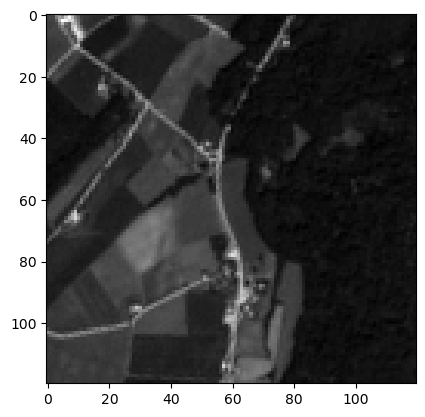

In [130]:
plt.imshow(image_array_norm, cmap='gray')

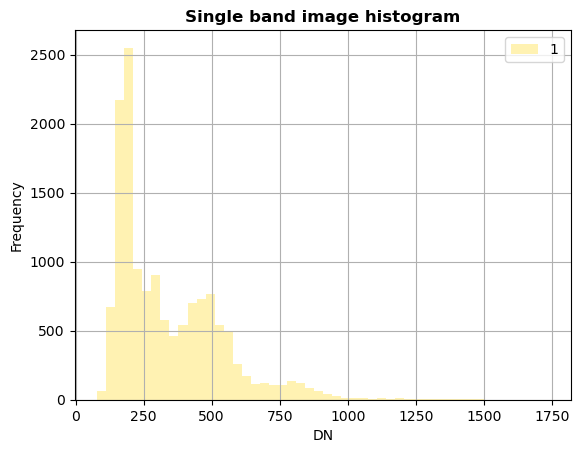

In [131]:
show_hist(
    image_array, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Single band image histogram")

### Masks
The BigEarthNet masks are provided as TIFF files. As reported in the [dataset description](https://bigearth.net/static/documents/Description_BigEarthNet_v2.pdf), each pixel in a mask (aka reference map) is associated to either one of the CLC Level-3 class labels or with an additional Unlabeled class label which indicates a pixel that does not have an associated CLC label.

In [132]:
tiles_mask_list = list_mask_files(MASKS_DATA_DIR, start_tile_index, end_tile_index)
print('Number of tiles in the directory: ', len(tiles_mask_list))

Number of tiles in the directory:  2


In [133]:
num_masks = print_images_list(tiles_mask_list)
print('Number of masks: {:d}'.format(num_masks))

S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_reference_map.tif


S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55_reference_map.tif




S2A_MSIL2A_20170613T101031_N9999_R022_T34VER_00_45_reference_map.tif


S2A_MSIL2A_20170613T101031_N9999_R022_T34VER_00_46_reference_map.tif




Number of masks: 4


We open one of the masks to find out the classes that have been used to label the pixels in the corresponding image

In [134]:
mask_path = str(tiles_mask_list[0][0][0])
mask_path

'data\\Reference_Maps\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_reference_map.tif'

We look at the values used in the mask

In [135]:
mask_ds = in_ds = gdal.Open(mask_path)
mask_data = mask_ds.GetRasterBand(1)
mask_array = mask_data.ReadAsArray()
unique_values = np.unique(mask_array)
print('Level 3 CLC classes: ', unique_values)

Level 3 CLC classes:  [211 231 311 313]


The data type for the mask pixel is also uint16

In [136]:
mask_array.dtype

dtype('uint16')

### Mask visualization
The values in a mask refer to the Corine 2018 classification. The values are divided in three levels. In the BigEarthNetv2 masks the pixel values refer to level 3.

### Corine2018 Level 3 Land Cover Classes and Color Codes
They can range from 111 to 523. The values in the 3 level may differ by only 1 or 2, e.g. 211, 212, 213, and the color in the plot might not be distinguished. We can improve the visualization by using the Corine2018 RGB color codes.

In [137]:
color_map_list = corine_l3_color_map()
under = color_map_list[0]
over = color_map_list[44]

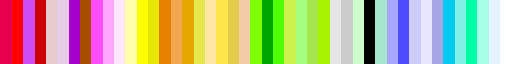

In [138]:
corine2018_l3_color_map = ListedColormap(corine_l3_color_map(), name='Corine2018 Level 3 RGB Color Codes')
corine2018_l3_color_map.with_extremes(under=under, over=over)

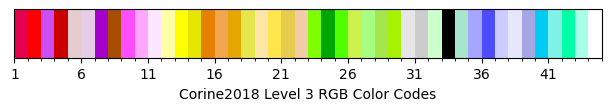

In [139]:
fig, ax = plt.subplots(figsize=(6, 1), layout='constrained')
bounds =  np.arange(1,46)
norm = matplotlib.colors.BoundaryNorm(bounds, corine2018_l3_color_map.N)

cbar = fig.colorbar(
    matplotlib.cm.ScalarMappable(cmap=corine2018_l3_color_map, norm=norm),
    cax=ax, orientation='horizontal',
    spacing='proportional',
    label='Corine2018 Level 3 RGB Color Codes',
)

In [140]:
corine2018_l3_class_bucket(111)

1

In [141]:
corine2018_l3_class_bucket(112)

2

In [142]:
mask_array.dtype

dtype('uint16')

### Updating the Corine2018 Level 3 class values
We map the Corine2018 values used in the masks to a set of integers from 1 to 45. With 45 color codes we can map all the 3rd level Corine2018 classes.

In [143]:
u_mask = corine_l3_mask(mask_array)
u_mask

array([[12, 12, 12, ..., 25, 25, 25],
       [12, 12, 12, ..., 25, 25, 25],
       [12, 12, 12, ..., 25, 25, 25],
       ...,
       [12, 12, 12, ..., 23, 23, 23],
       [12, 12, 12, ..., 23, 23, 23],
       [12, 12, 12, ..., 23, 23, 23]], dtype=int8)

In [144]:
np.unique(u_mask)

array([12, 18, 23, 25], dtype=int8)

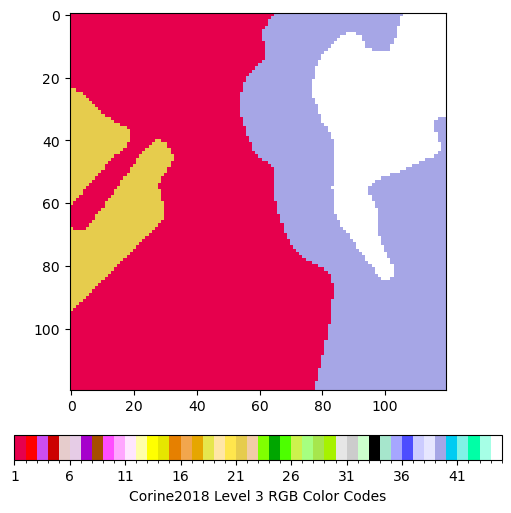

In [145]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
corine2018_l3_color_map = ListedColormap(corine_l3_color_map(), name='Corine2018 Color Codes')
bounds = np.arange(1,46)
norm = matplotlib.colors.BoundaryNorm(bounds, corine2018_l3_color_map.N)
cbar = fig.colorbar(
    matplotlib.cm.ScalarMappable(cmap=corine2018_l3_color_map, norm=norm),
    ax=ax, orientation='horizontal',
    spacing='proportional',
    label='Corine2018 Level 3 RGB Color Codes',
)
#ticks = np.arange(1,46)
#cbar.set_ticks(ticks=ticks, labels=corine2018_labels()) 
#cbar.ax.tick_params(labelsize=10)
ax.imshow(u_mask, cmap=corine2018_l3_color_map, interpolation='nearest', interpolation_stage='rgba')

### Corine2018 Level 1 Land Cover Classes and Color Codes
From the [statistics](benv2_statistics.ipynb) we can see that some classes are used much more often than others, in other words the dataset is skewed and this fact may have an impact on the performance of the segmentation process. We may want to use only the Corine level 1 values for the classes instead of level 3, reducing the number of classes from 45 to 6. In order to use the Corine2018 Level 1 Land Cover Classes we have to perform the following steps:
1. Define a function to map a L3 value to a L1 value and its inverse function from L1 to L3
2. Define a function to map the values in the mask files from Corine2018 Level 3 to level 1
3. Create the Level 1 color map, with only 6 color codes
4. Create the labels for Level 1 (6 labels)

In [146]:
corine2018_l1_class_bucket(999)

6

In [156]:
corine_l1_color_codes = corine_l1_color_map()
corine_l1_color_codes

['#e6004d', '#ffffa8', '#80ff00', '#a6a6ff', '#00ccf2', '#ffffff']

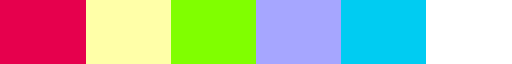

In [157]:
corine_l1_color_map = ListedColormap(corine_l1_color_codes, name='Corine2018 Level 1 RGB Colors')
corine_l1_color_map

In [158]:
mask_array = get_image_array(mask_path)

In [159]:
cl1_mask_array = corine_l1_mask(mask_array)
np.unique(cl1_mask_array)

array([2, 3], dtype=int8)

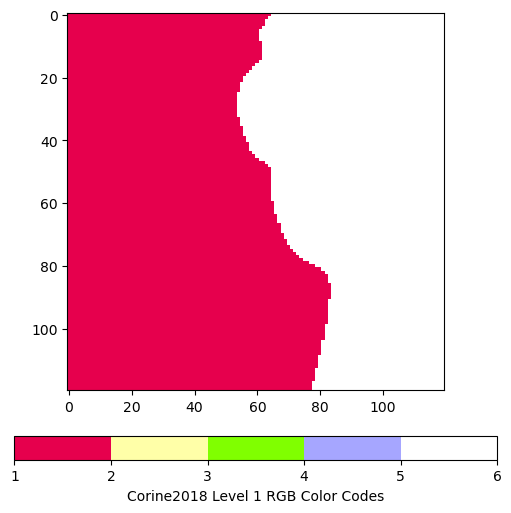

In [161]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
corine2018_l1_color_map = ListedColormap(corine_l1_color_codes, name='Corine2018 Level 1 Color Codes')
bounds = np.arange(1, 7)
norm = matplotlib.colors.BoundaryNorm(bounds, corine2018_l1_color_map.N)
cbar = fig.colorbar(
    matplotlib.cm.ScalarMappable(cmap=corine2018_l1_color_map, norm=norm),
    ax=ax, orientation='horizontal',
    spacing='proportional',
    label='Corine2018 Level 1 RGB Color Codes',
)
#ticks = np.arange(1,46)
#cbar.set_ticks(ticks=ticks, labels=corine2018_labels()) 
#cbar.ax.tick_params(labelsize=10)
ax.imshow(cl1_mask_array, cmap=corine2018_l1_color_map, interpolation='nearest', interpolation_stage='rgba')

In [169]:
target_mask_l1_name = pathlib.Path(mask_path).name[:-17] + 'l1_mask.png'
target_mask_l1_name

'S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_l1_mask.png'

In [171]:
target_mask_l1_name = pathlib.Path(mask_path).name[:-17] + 'l1_mask.png'
target_mask_l1_name
target_l1_mask = 'data/png_sample_pairs/masks_nc/' + target_mask_l1_name
target_l1_mask
mapCorineL1(mask_path, target_l1_mask)
target_l1_mask_array = get_image_array(target_l1_mask)
target_l1_mask_array
plt.imshow(target_l1_mask_array, cmap=corine2018_l1_color_map)

'data/png_sample_pairs/masks_nc/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_l1_mask.png'

In [174]:
mapCorineL1(mask_path, target_l1_mask)

0

In [175]:
target_l1_mask_array = get_image_array(target_l1_mask)
target_l1_mask_array

array([[2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3]], dtype=uint8)

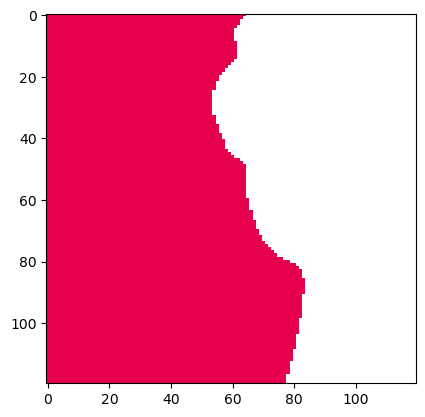

In [176]:
plt.imshow(target_l1_mask_array, cmap=corine2018_l1_color_map)

In [177]:
def mapCorineL1_list(source_folder, target_folder):
    '''
    This function creates new mask PNG files in the target folder from 
    source mask files in the source folder by mapping the Corine2018 
    level 3 color codes of the source files to level 1 (5 + 1 classes)
    '''
    target_masks = []
    source_masks_folder_path = pathlib.Path(source_folder)
    source_masks = [str(file) for file in source_masks_folder_path.iterdir()]
    num_source_masks = len(source_masks)
    for source_mask in source_masks:
        #print('Source mask: {}', source_mask)
        target_mask_name = pathlib.Path(source_mask).name[:-4] + '_nc.png'    
        target_mask = target_folder + target_mask_name
        #print('Target mask: {}', target_mask)
        mapCorineL1(source_mask, target_mask)
        target_masks.append(target_mask)
    return target_masks


## Creating a PNG RGB dataset from TIFF images
A PNG file doesn't contain metadata so, in order to create a RGB image, we only need to use the bands from three GeoTIFF file. We use the same data type for the PNG files, i.e. uint16, as in the TIFF files, for the images and the masks.

In [39]:
tile_index = 0
patch_index = 0
print('Number of bands used for RGB images: {:d}'.format(len(tiles_list[tile_index][patch_index])))

Number of bands used for RGB images: 3


In [40]:
createPNG(tiles_list[tile_index][patch_index], 'data/rgb.png')

1

In [41]:
get_raster_attributes('data/rgb.png')

dtypes: uint8
Number of bands: 3
Band width: 120, band height: 120
Dataset affine transform:
 | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
EPSG Coordinates Reference System: None
Bounding box 
 left: 0.00, 
 bottom: 120.00, 
 right: 120.00, 
 top: 0.00


(120,
 120,
 None,
 Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0))

In [42]:
png_array = get_image_array('data/rgb.png')
png_array.dtype, png_array.shape

(dtype('uint8'), (3, 120, 120))

We change the order of the array's axis from (channel, height, width) to (height, width, channel) so that we can plot the 3D array with Matplotlib

In [43]:
png_array_perm = np.moveaxis(png_array, 0, 2)
png_array_perm.shape

(120, 120, 3)

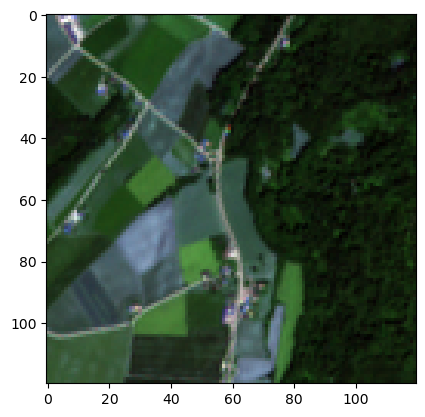

In [44]:
plt.imshow(png_array_perm)

In [45]:
pngs_list = createPNGs(tiles_list)

The image PNG file already exists.
The image PNG file already exists.
The image PNG file already exists.
The image PNG file already exists.


In [46]:
print('Number of PNG image files: ',len(pngs_list))

Number of PNG image files:  4


It might be useful to recursively delete the image and mask png file created with previous version of the function using a simple bash command that looks for all the files whose name starts with 'R' and ends with '.png'

````
$ find . -type f -name "R*.png"
````

## Creating a PNG dataset from TIFF masks
The masks are provided in the TIFF format so we apply the same trasformation. The difference with respect to the RGB images is that there is only one band for each mask patch. We have to use the uint16 data type because uint8 with value from 0 to 255 is not enough to cover the Corine level 3 class codes.

In [47]:
mask_png_path = 'data/mask.png'
createMaskPNG(mask_path, mask_png_path)

1

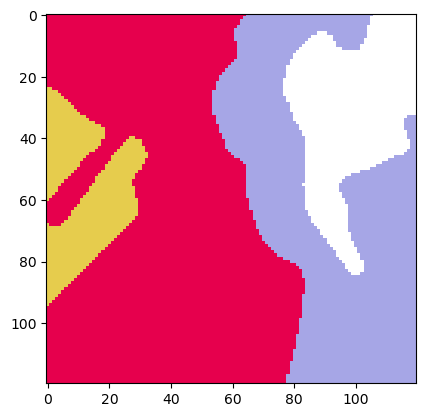

In [49]:
mask_png = rasterio.open('data/mask.png')
c_mask = corine_l3_mask(mask_png.read(1))
show(c_mask, cmap=corine2018_l3_color_map)
mask_png.close()

We make sure that the class values used in the mask PNG file are the same as in the original TIFF file 

In [50]:
mask_ds = in_ds = gdal.Open(mask_png_path)
mask_data = mask_ds.GetRasterBand(1)
mask_array = mask_data.ReadAsArray()
print('Level 3 CLC classes: ', np.unique(mask_array))

Level 3 CLC classes:  [211 231 311 313]


In [51]:
print('Number of bands in the file: ', mask_ds.RasterCount)

Number of bands in the file:  1


In [52]:
mask_file_name = 'S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_reference_map.tif'
tile, patch, date = read_mask_name(mask_file_name)
print('Tile: {}, Patch: {}, Date: {}'.format(tile, patch, date))

Tile: R022_T33UUP, Patch: 26_57, Date: 20170613


In [53]:
masks_png_list = createMaskPNGs(tiles_mask_list)

The mask PNG file already exists.
The mask PNG file already exists.
The mask PNG file already exists.
The mask PNG file already exists.


## Zip and unzip PNG files
We may want to compress all the PNG images into one zip file

In [87]:
rgb_zip_file = 'data/bigearthnet_pngs.zip'

In [88]:
zip_pngs(pngs_list, rgb_zip_file)

we do the same for the mask PNG files

In [89]:
masks_zip_file = 'data/bigearthnet_mask_pngs.zip'

In [90]:
zip_pngs(masks_png_list, masks_zip_file)

We may also want to decompress the zip files into another folder 

In [91]:
unzip_folder = 'zip/'

In [92]:
unzip_pngs(rgb_zip_file, unzip_folder)

In [93]:
unzip_pngs(masks_zip_file, unzip_folder)

## Visualization

In [54]:
path_name = pathlib.Path(pngs_list[0]).name
path_name

'R022_T33UUP_26_57_20170613.png'

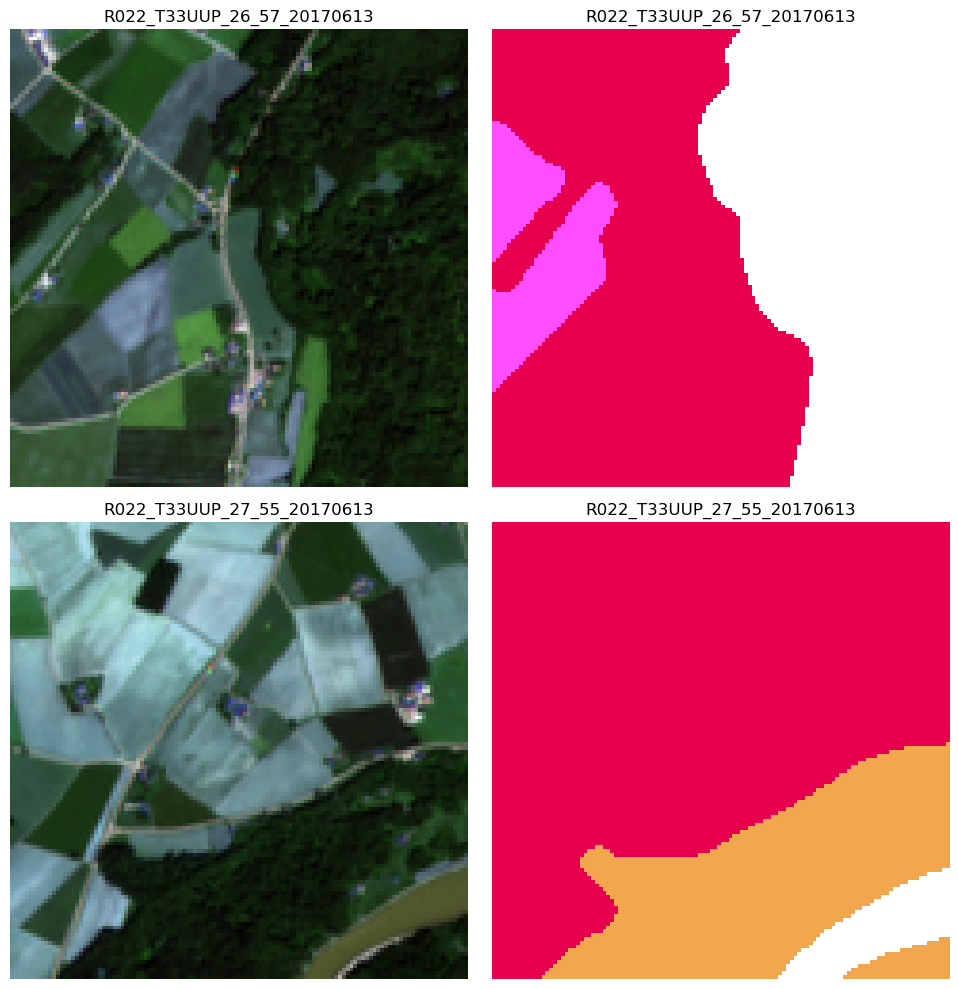

In [58]:
plot_examples(pngs_list, masks_png_list, start=0, end=2)

## Mapping the Corine2018 Level 3 mask values to [1, 45]
Using the Corine2018 color codes at the 3rd level requires using 16 bit to store the values, from 1 to 523, resulting in more space for the PNG files unnecesserily. We can simply use the order index of the color codes instead, from 1 to 44 adding also a place 45 for the non classfied pixels so that 8 bits, i.e. uint8 data type, would be more than enough. We define a function to create a target mask with pixel values in [1, 45] from a source mask with pixel values from the 3rd level of the Corine2018 codes.

We create the target file name from the source file and the target folder

In [59]:
source_masks_folder = 'data/png_sample_pairs/masks/'
masks_folder_path = pathlib.Path(source_masks_folder)
source_masks = [str(file) for file in masks_folder_path.iterdir()]
len(source_masks)

64

In [60]:
target_masks_folder = 'data/png_sample_pairs/masks_nc/'
source_mask = pathlib.Path(source_masks[0]).name
target_mask_name = source_mask[:-4] + '_nc.png'
target_mask = target_masks_folder + target_mask_name
target_mask

'data/png_sample_pairs/masks_nc/R008_T31UGS_00_60_20171015_mask_nc.png'

We look for the unique values in one of the source masks

In [61]:
source_mask_array = get_image_array(source_masks[0])
np.unique(source_mask_array)

array([211, 231, 242], dtype=uint16)

In [63]:
for c in np.unique(source_mask_array):
    print('Corine2018 level 3 color code: {:d}, Index: {:d}'.format(c, corine2018_l3_class_bucket(c)))

Corine2018 level 3 color code: 211, Index: 12
Corine2018 level 3 color code: 231, Index: 18
Corine2018 level 3 color code: 242, Index: 20


We perform the mapping using the function defined above

In [69]:
if (mapCorineL3(source_masks[0], target_mask) == 1):
    print('The target file \'{}\' already exists'.format(target_mask))

The target file 'data/png_sample_pairs/masks_nc/R008_T31UGS_00_60_20171015_mask_nc.png' already exists


We check the pixel values and the dtype in the new mask to see whether they are as expected

In [9]:
target_mask_array = get_image_array(target_mask)
np.unique(target_mask_array)

array([12, 18, 20], dtype=uint8)

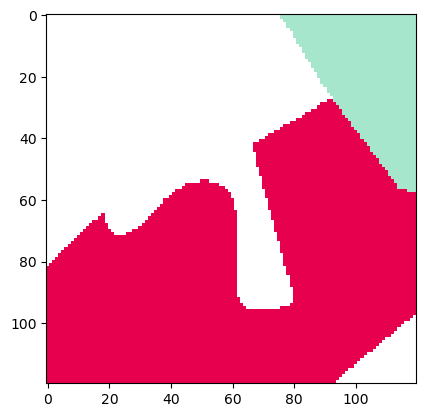

In [13]:
plt.imshow(target_mask_array, cmap=corine2018_color_map)

Now we define another function to map all the masks in a folder

In [213]:
nc_masks = mapCorineL3_list(source_masks_folder, target_masks_folder)
len(nc_masks)

64

In [214]:
for mask in nc_masks[:10]:
    mask_array = get_image_array(mask)
    print(np.unique(mask_array))

[12 18 20]
[ 2 12 18 20 23 25]
[ 2 18 20 23 25]
[ 2 12 16 20 25]
[ 2 16 18 20 25]
[ 2 18 20]
[ 2 18 20]
[ 2 18 20 21]
[ 2 20 21]
[ 2 18 20]


We plot the new masks for a visual check

In [215]:
def plot_masks(masks_list):
    num_rows = 8
    num_cols = 8
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))
    corine2018_l3_color_map = ListedColormap(corine_l3_color_map())
    i = 0
    for col in range(num_cols):
        for row in range(num_rows):
            msk = Image.open(masks_list[i])
            axs[row, col].set_axis_off()
            axs[row, col].imshow(msk, cmap=corine2018_l3_color_map)
            i += 1

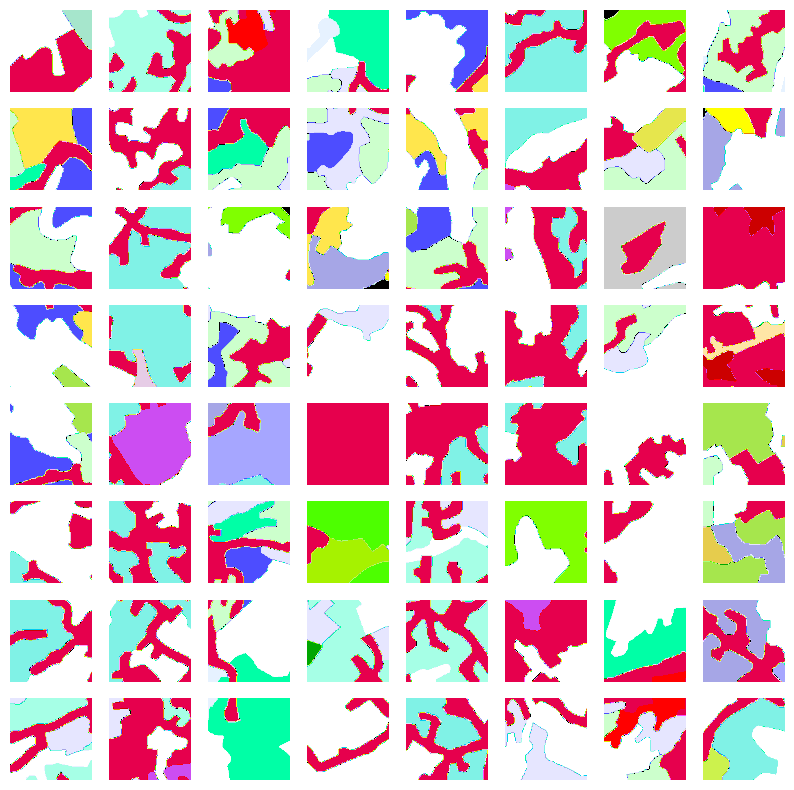

In [216]:
plot_masks(nc_masks)

## Mapping the Corine2018 Level 3 mask values to Level 1
We create a new mask by transforming the Corine level 3 values to level 1. Since level 1 contains only 5 + 1 classes the segmentation task should be easier even though less accurate.

In [186]:
mask_path

'data\\Reference_Maps\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_reference_map.tif'

In [187]:
target_mask_l1_name = pathlib.Path(mask_path).name[:-17] + 'l1_mask.png'
target_mask_l1_name

'S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_l1_mask.png'

In [188]:
target_l1_mask = 'data/png_sample_pairs/masks_nc/' + target_mask_l1_name
target_l1_mask

'data/png_sample_pairs/masks_nc/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_l1_mask.png'

In [189]:
mapCorineL1(mask_path, target_l1_mask)

1

In [190]:
target_l1_mask_array = get_image_array(target_l1_mask)
target_l1_mask_array

array([[2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3]], dtype=uint8)

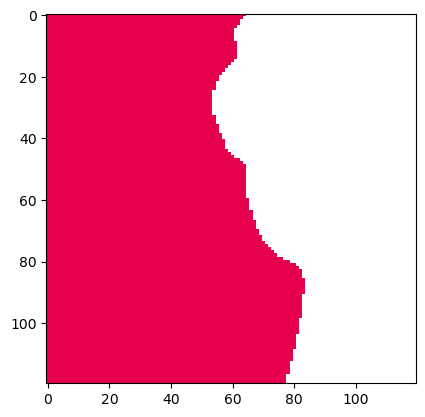

In [191]:
plt.imshow(target_l1_mask_array, cmap=corine2018_l1_color_map)

We apply the transfomation from Level 3 to Level 1 to a set of masks

In [193]:
source_masks_folder = 'data/png_sample_pairs/masks/'
target_l1_masks_folder = 'data/png_sample_pairs/masks_nc/'

In [196]:
source_mask_path = source_masks_folder + 'R008_T31UGS_00_60_20171015_mask.png'
target_mask_name = pathlib.Path(source_mask_path).name[:-8] + 'l1_mask.png'
target_mask_name

'R008_T31UGS_00_60_20171015_l1_mask.png'

In [209]:
masks_l1 = mapCorineL1_list(source_masks_folder, target_l1_masks_folder)
len(masks_l1)

64

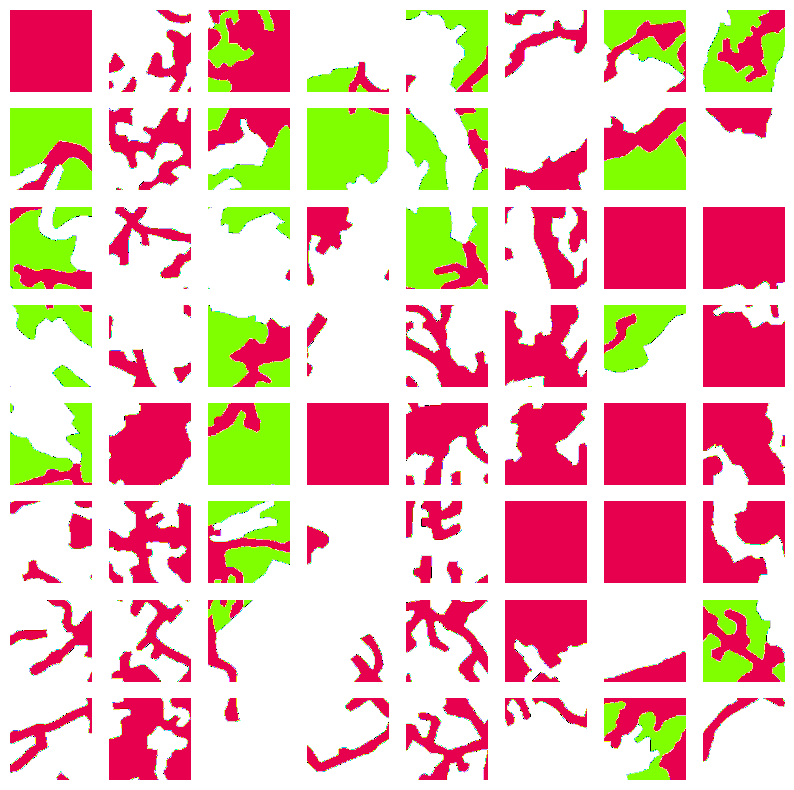

In [217]:
plot_masks(masks_l1)

## References
* [Sumbul et al. - BigEarthNet: A Large-Scale Benchmark Archive For Remote Sensing Image Understanding](https://arxiv.org/abs/1902.06148)
* [Clasen et al. - reBEN: Refined BigEarthNet Dataset for Remote Sensing Image Analysis](https://arxiv.org/abs/2407.03653)
* [Ulmas et al. - Segmentation of Satellite Imagery using U-Net Models for Land Cover Classification](https://arxiv.org/abs/2003.02899)
* [Walsh et al. - Using machine learning to produce a very high resolution land-cover map for Ireland](https://asr.copernicus.org/articles/18/65/2021/)
* [Corine2018 Land Cover Classes and RGB Color Codes](https://www.eea.europa.eu/data-and-maps/data/corine-land-cover-2/corine-land-cover-classes-and/clc_legend.csv)